## Code Implementation for Real-Time Stock Market Analysis and Prediction using NLP

1. Install Required Libraries

In [1]:
!pip install requests pandas textblob yfinance scikit-learn matplotlib seaborn


** Step 2: Step 2: Fetch Real-Time Cryptocurrency Market Data **

                                   Open          High           Low  \
Datetime                                                              
2025-03-17 19:00:00+00:00  84499.625000  84708.281250  84334.804688   
2025-03-17 20:00:00+00:00  84475.273438  84475.273438  83887.921875   
2025-03-17 21:00:00+00:00  83947.562500  84194.000000  83898.468750   
2025-03-17 22:00:00+00:00  84085.515625  84214.867188  84038.789062   
2025-03-17 23:00:00+00:00  84077.203125  84077.203125  83977.640625   

                                  Close      Volume  Dividends  Stock Splits  
Datetime                                                                      
2025-03-17 19:00:00+00:00  84482.695312  2737496064        0.0           0.0  
2025-03-17 20:00:00+00:00  83887.921875  2619140096        0.0           0.0  
2025-03-17 21:00:00+00:00  84076.070312  2515232768        0.0           0.0  
2025-03-17 22:00:00+00:00  84107.632812  1833033728        0.0           0.0  
2025-03-17 23:00:00+00:00  8

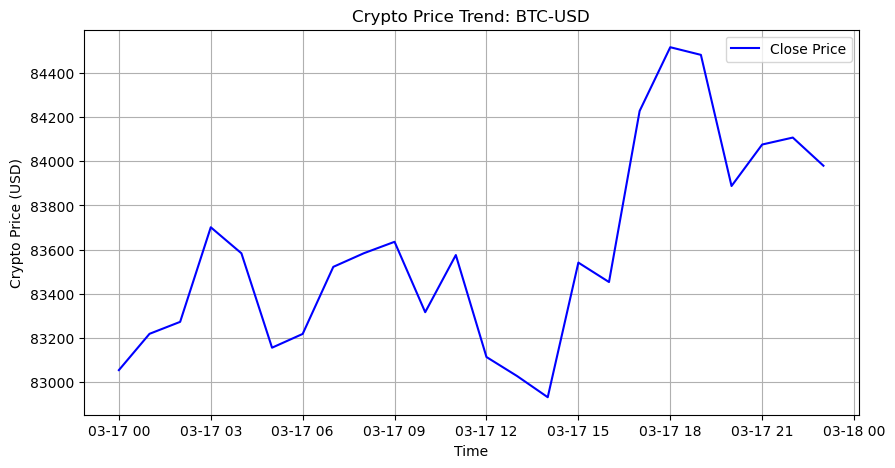

In [15]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#   Function to fetch real-time cryptocurrency data
def get_crypto_data(symbol, period="1d", interval="1h"):
    crypto = yf.Ticker(symbol)
    data = crypto.history(period=period, interval=interval)
    return data

#   Fetch cryptocurrency data for Bitcoin
crypto_symbol = "BTC-USD"  # Change to Ethereum (ETH-USD), BinanceCoin (BNB-USD), etc.
crypto_data = get_crypto_data(crypto_symbol)

#   Display last few records
print(crypto_data.tail())

#   Plot cryptocurrency closing price trend
plt.figure(figsize=(10,5))
plt.plot(crypto_data.index, crypto_data['Close'], label="Close Price", color="blue")
plt.xlabel("Time")
plt.ylabel("Crypto Price (USD)")
plt.title(f"Crypto Price Trend: {crypto_symbol}")
plt.legend()
plt.grid()
plt.show()


Step 3: Fetch Real-Time Cryptocurrency News



In [19]:
import requests

#   Replace with your actual GNews API Key
GNEWS_API_KEY = "da87cc30e81b84f3eaa5e5130dd9db00"
GNEWS_BASE_URL = "https://gnews.io/api/v4/search"

#   Function to fetch real-time cryptocurrency news
def get_crypto_news():
    params = {
        "q": "cryptocurrency OR Bitcoin OR Ethereum OR Binance",
        "token": GNEWS_API_KEY,
        "lang": "en",
        "max": 10  # Fetch latest 10 articles
    }
    response = requests.get(GNEWS_BASE_URL, params=params)
    data = response.json()

    if "articles" in data:
        news_list = [{"title": article["title"], "source": article["source"]["name"], 
                      "published_at": article["publishedAt"], "url": article["url"]}
                     for article in data["articles"]]
        return pd.DataFrame(news_list)
    else:
        print(f"❌ Error fetching news: {data}")
        return pd.DataFrame()

#   Fetch and display cryptocurrency news
crypto_news = get_crypto_news()
display(crypto_news)


,title,source,published_at,url
0,"Standard Chartered slashes ether price target,...",CNBC,2025-03-17T18:18:38Z,https://www.cnbc.com/2025/03/17/standard-chart...
1,Strategy buys more Bitcoin after announcing pr...,The Mercury News,2025-03-17T16:44:30Z,https://www.mercurynews.com/2025/03/17/strateg...
2,New MassJacker malware is hijacking digital wa...,Tom's Guide,2025-03-17T15:39:23Z,https://www.tomsguide.com/computing/malware-ad...
3,Bitcoin proxy MicroStrategy is outperforming t...,CNBC,2025-03-17T15:35:00Z,https://www.cnbc.com/2025/03/17/bitcoin-proxy-...
4,Analysts Predict Strong Bitcoin Comeback in April,Newsweek,2025-03-17T10:58:12Z,https://www.newsweek.com/analyst-predict-bitco...
5,How Trump's ties to the crypto world could get...,Yahoo Canada Finance,2025-03-16T13:00:47Z,https://ca.finance.yahoo.com/news/how-trumps-t...
6,How Trump's ties to the crypto world could get...,Yahoo Finance,2025-03-16T13:00:47Z,https://finance.yahoo.com/news/how-trumps-ties...
7,Saskatchewan premier says photo of him being u...,BayToday,2025-03-14T23:01:05Z,https://www.baytoday.ca/business/saskatchewan-...
8,Saskatchewan premier says photo of him being u...,SooToday,2025-03-14T23:01:05Z,https://www.sootoday.com/national-business/sas...
9,Saskatchewan premier says photo of him being u...,Vancouver Is Awesome,2025-03-14T23:01:05Z,https://www.vancouverisawesome.com/national-bu...


Step 4: Perform Sentiment Analysis on Crypto News Headlines

Uses TextBlob to calculate sentiment polarity

-1 (Negative) → 0 (Neutral) → +1 (Positive)

In [22]:
from textblob import TextBlob

#   Function to analyze sentiment of news headlines
def analyze_sentiment(news_df):
    if news_df.empty:
        return None

    sentiment_scores = []
    for title in news_df["title"]:
        sentiment = TextBlob(title).sentiment.polarity  # -1 (negative) to +1 (positive)
        sentiment_scores.append(sentiment)

    news_df["sentiment"] = sentiment_scores
    return news_df

#   Perform sentiment analysis
news_sentiment = analyze_sentiment(crypto_news)

#   Display news with sentiment scores
if not news_sentiment.empty:
    display(news_sentiment)


,title,source,published_at,url,sentiment
0,"Standard Chartered slashes ether price target,...",CNBC,2025-03-17T18:18:38Z,https://www.cnbc.com/2025/03/17/standard-chart...,0.000000
1,Strategy buys more Bitcoin after announcing pr...,The Mercury News,2025-03-17T16:44:30Z,https://www.mercurynews.com/2025/03/17/strateg...,0.500000
2,New MassJacker malware is hijacking digital wa...,Tom's Guide,2025-03-17T15:39:23Z,https://www.tomsguide.com/computing/malware-ad...,0.116883
3,Bitcoin proxy MicroStrategy is outperforming t...,CNBC,2025-03-17T15:35:00Z,https://www.cnbc.com/2025/03/17/bitcoin-proxy-...,0.000000
4,Analysts Predict Strong Bitcoin Comeback in April,Newsweek,2025-03-17T10:58:12Z,https://www.newsweek.com/analyst-predict-bitco...,0.433333
5,How Trump's ties to the crypto world could get...,Yahoo Canada Finance,2025-03-16T13:00:47Z,https://ca.finance.yahoo.com/news/how-trumps-t...,0.000000
6,How Trump's ties to the crypto world could get...,Yahoo Finance,2025-03-16T13:00:47Z,https://finance.yahoo.com/news/how-trumps-ties...,0.000000
7,Saskatchewan premier says photo of him being u...,BayToday,2025-03-14T23:01:05Z,https://www.baytoday.ca/business/saskatchewan-...,0.000000
8,Saskatchewan premier says photo of him being u...,SooToday,2025-03-14T23:01:05Z,https://www.sootoday.com/national-business/sas...,0.000000
9,Saskatchewan premier says photo of him being u...,Vancouver Is Awesome,2025-03-14T23:01:05Z,https://www.vancouverisawesome.com/national-bu...,0.000000


Step 5: Predict Cryptocurrency Market Trend Using Sentiment Data

Predicts HIGH (Bullish) / LOW (Bearish) / STABLE (Neutral)

Based on average sentiment score of news



In [26]:
#   Function to predict market trend based on sentiment
def predict_market_trend(news_sentiment):
    if news_sentiment is None or news_sentiment.empty:
        return "No Prediction"

    avg_sentiment = news_sentiment["sentiment"].mean()

    if avg_sentiment > 0.2:
        return "HIGH (Bullish)"
    elif avg_sentiment < -0.2:
        return "LOW (Bearish)"
    else:
        return "STABLE (Neutral)"

#   Predict market trend
predicted_trend = predict_market_trend(news_sentiment)

#   Display prediction
print(f"\n📊 **Predicted Crypto Market Trend Based on News Sentiment:** {predicted_trend}")



📊 **Predicted Crypto Market Trend Based on News Sentiment:** STABLE (Neutral)


Step 6: Train a Machine Learning Model for Cryptocurrency Price Prediction

Trains Random Forest on crypto price data
Predicts closing price based on Open, High, Low, and Volume

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np

#   Prepare cryptocurrency data for ML model
crypto_data["returns"] = crypto_data["Close"].pct_change()
crypto_data = crypto_data.dropna()

#   Feature selection
X = crypto_data[["Open", "High", "Low", "Volume"]]  # Features
y = crypto_data["Close"]  # Target

#   Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#   Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

#   Predict cryptocurrency price
predicted_prices = model.predict(X_test)

#   Display results
print("\n📈 **Crypto Price Prediction Results:**")
print(f"Actual Price: {np.round(y_test.values[:5], 2)}")
print(f"Predicted Price: {np.round(predicted_prices[:5], 2)}")



📈 **Crypto Price Prediction Results:**
Actual Price: [83452.49 83315.68 83217.63 83634.95 84517.34]
Predicted Price: [83436.41 83547.14 83197.2  83665.78 84146.68]


4. Display Crypto Price Predictions with Time

In [34]:
#   Display crypto price predictions with timestamps
predictions_df = pd.DataFrame({
    "Timestamp": X_test.index,  # Use the test set timestamps
    "Actual Price": y_test.values,
    "Predicted Price": predicted_prices
}).sort_values(by="Timestamp")

#   Display the predictions in Jupyter Notebook
from IPython.display import display
display(predictions_df.head())


,Timestamp,Actual Price,Predicted Price
2,2025-03-17 01:00:00+00:00,83217.632812,83197.202500
3,2025-03-17 09:00:00+00:00,83634.953125,83665.777656
1,2025-03-17 10:00:00+00:00,83315.679688,83547.139922
0,2025-03-17 16:00:00+00:00,83452.492188,83436.407344
4,2025-03-17 18:00:00+00:00,84517.335938,84146.676250


5 . Visualize Crypto Price Prediction vs. Actual Prices

Now, let's plot the actual vs. predicted crypto prices.

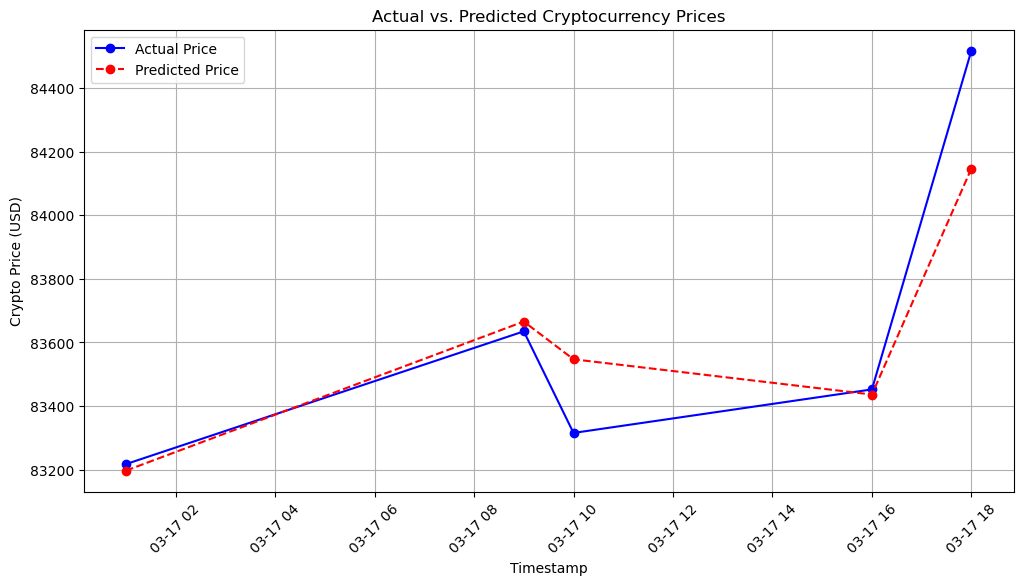

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(predictions_df["Timestamp"], predictions_df["Actual Price"], label="Actual Price", color="blue", marker="o")
plt.plot(predictions_df["Timestamp"], predictions_df["Predicted Price"], label="Predicted Price", color="red", linestyle="dashed", marker="o")

plt.xlabel("Timestamp")
plt.ylabel("Crypto Price (USD)")
plt.title("Actual vs. Predicted Cryptocurrency Prices")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()


Evaluate Model Accuracy (MSE, RMSE, R² Score)

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

#   Calculate errors
mae = mean_absolute_error(y_test, predicted_prices)
mse = mean_squared_error(y_test, predicted_prices)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predicted_prices)

#   Display metrics
print("\n📊 **Model Performance Metrics:**")
print(f"📌 Mean Absolute Error (MAE): {mae:.2f}")
print(f"📌 Mean Squared Error (MSE): {mse:.2f}")
print(f"📌 Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"📌 R² Score: {r2:.4f}")



📊 **Model Performance Metrics:**
📌 Mean Absolute Error (MAE): 133.89
📌 Mean Squared Error (MSE): 38517.74
📌 Root Mean Squared Error (RMSE): 196.26
📌 R² Score: 0.8229


additional : Scatter Plot - Actual vs. Predicted Prices

If points are near the red dashed line, the model is accurate.

Points far from the line indicate prediction errors.



/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


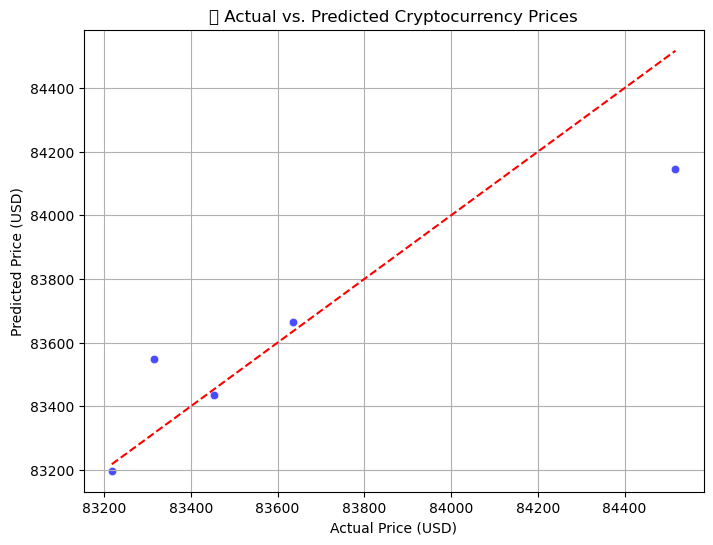

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=predictions_df["Actual Price"], y=predictions_df["Predicted Price"], color="blue", alpha=0.7)

plt.plot([predictions_df["Actual Price"].min(), predictions_df["Actual Price"].max()], 
         [predictions_df["Actual Price"].min(), predictions_df["Actual Price"].max()], 
         color="red", linestyle="dashed")  # Ideal line (y = x)

plt.xlabel("Actual Price (USD)")
plt.ylabel("Predicted Price (USD)")
plt.title("📊 Actual vs. Predicted Cryptocurrency Prices")
plt.grid()
plt.show()


Residual Plot - Errors in Predictions

Random scatter around zero → Model is well-fitted

Pattern in errors → Model needs improvement

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


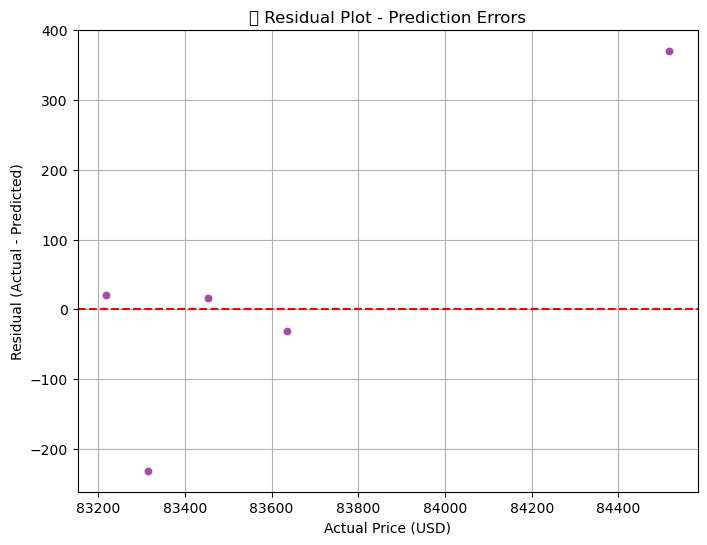

In [48]:
plt.figure(figsize=(8, 6))
residuals = predictions_df["Actual Price"] - predictions_df["Predicted Price"]

sns.scatterplot(x=predictions_df["Actual Price"], y=residuals, color="purple", alpha=0.7)

plt.axhline(y=0, color="red", linestyle="dashed")  # Zero error line
plt.xlabel("Actual Price (USD)")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("📉 Residual Plot - Prediction Errors")
plt.grid()
plt.show()
